In [1]:
%load_ext autoreload
%autoreload 2
import os
from io import BytesIO
import base64

import numpy as np
import pandas as pd
import geopandas as gpd

from flood_finder.urban_areas import UrbanAreas

from shapely.geometry import box
from shapely.ops import unary_union
import contextily as cx
import matplotlib.pyplot as plt
from adjustText import adjust_text



In [2]:
from hydrology.reporter import HydrologyReport, Otto

## Hydrology Report Class

In [3]:
hreport = HydrologyReport(
    urban_areas_path='/data/RS_BR_Urban_Areas/',
    municipalities_path='/data/Estacoes_Municipios/Mun_MIDR_Pop_2022 1.shp',
    reaches_path='/data/Hidrografia/BHO_2017_5k/bho_250k_v_02_03.gpkg',
    watersheds_path = '/data/Hidrografia/BHO_2017_5k/geoft_bho_2017_5k_area_drenagem.gpkg',
    stations_path='/data/Hidrografia/Hidrorreferenciamento/Fluviometricas_Hidrorreferenciadas_Brasil_vf.shp'
)


Entering parallel processing with 6 workers


Warning 1: disk I/O error: this file is a WAL-enabled database. It cannot be opened because it is presumably read-only or in a read-only directory. Retrying with IMMUTABLE=YES open option


Function _load_municipalities finished in 5.33 seconds
Function _load_stations finished in 20.32 seconds
Function _load_urban_area finished in 21.36 seconds
Function _load_reaches finished in 28.55 seconds
Function _load_watersheds finished in 50.33 seconds
shuting down the executor


In [19]:
hreport.select_urban_area("Pelotas", area_factor=0.6)

Selecting reaches upstream Pelotas


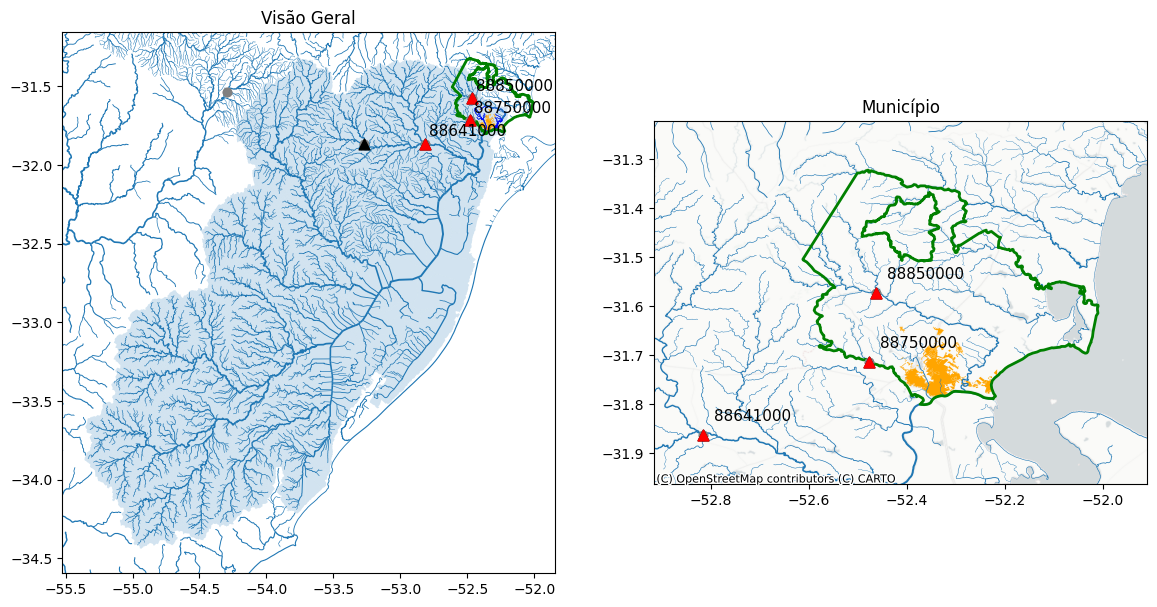

In [20]:
map, axs = plt.subplots(1, 2, figsize=(14, 10))
# plot the context
ax = axs[0]
hreport.plot_context(ax=ax)

# plot the municipality
ax = axs[1]
hreport.plot_municipality(ax=ax, stations=True)

* select downstream reaches. get the stations on these reaches and select the ones closer to the starting reach
* além dessas, mostrar em cinza outras estações, mas não serão selecionadas
<!-- * for each downstream reach, look upstream the other branch and get any station... store the distance from the current reach and the station.  -->
* start from the otto level 6, 5, 4 and try to select a station within this polygon

## Log to the Datalake

In [50]:
self = hreport

In [57]:
self.create_report('./RS')

In [44]:
maximum, fig = self.calc_return_times(76440000)

In [52]:
maximum = maximum.drop(columns=['Month',	'Year',	'Day'])

In [53]:
maximum

Ano Hidro  Discharge   DateTime  TR \n gumbel_r  TR \n lognorm
0   1941/1942    2170.29 1942-05-18           98.57         541.24
42  1983/1984    2047.14 1984-05-07           67.12         277.75
12  1953/1954    1722.62 1953-10-02           24.56          52.84
68  2009/2010    1453.86 2010-01-20           10.85          15.42
13  1954/1955    1434.77 1955-06-05           10.25          14.22
..        ...        ...        ...             ...            ...
66  2007/2008     353.47 2008-05-29            1.05           1.05
26  1967/1968     245.26 1967-10-05            1.01           1.02
70  2011/2012     210.69 2012-09-19            1.01           1.01
36  1977/1978     162.68 1978-07-21            1.00           1.01
7   1948/1949     129.97 1948-10-31            1.00           1.01

[83 rows x 5 columns]

In [36]:
data = self.get_discharge(76440000)
data.head()

Month  Year  Discharge  Day  Ano Hidro
DateTime                                          
1941-11-01     11  1941       1.88    1  1941/1942
1941-11-02     11  1941       1.62    2  1941/1942
1941-11-03     11  1941       1.62    3  1941/1942
1941-11-04     11  1941       1.79    4  1941/1942
1941-11-05     11  1941       2.36    5  1941/1942

In [37]:
maximum = (
    data.groupby(by="Ano Hidro").max()[["Discharge"]]
)
maximum = maximum.sort_values(by="Discharge", ascending=False)

In [40]:
maximum = maximum.reset_index().set_index(['Ano Hidro', 'Discharge'])
maximum

Empty DataFrame
Columns: []
Index: [(1941/1942, 2170.29), (1983/1984, 2047.14), (1953/1954, 1722.62), (2009/2010, 1453.86), (1954/1955, 1434.77), (1946/1947, 1359.39), (2015/2016, 1342.65), (1978/1979, 1340.79), (2002/2003, 1272.36), (1986/1987, 1253.83), (1972/1973, 1220.69), (2018/2019, 1207.89), (1981/1982, 1192.48), (1980/1981, 1188.44), (1971/1972, 1178.34), (1964/1965, 1172.29), (1997/1998, 1144.25), (2016/2017, 1132.61), (1982/1983, 1128.33), (2003/2004, 1124.63), (2005/2006, 1106.59), (1987/1988, 1092.84), (2012/2013, 1085.01), (1958/1959, 1069.41), (1942/1943, 989.91), (1989/1990, 981.38), (1975/1976, 973.84), (2020/2021, 962.62), (1961/1962, 960.75), (2013/2014, 947.71), (1965/1966, 945.85), (1993/1994, 934.74), (1979/1980, 921.83), (1962/1963, 907.16), (1985/1986, 903.51), (2001/2002, 892.67), (1943/1944, 888.78), (1970/1971, 885.55), (1966/1967, 885.32), (1992/1993, 874.48), (1955/1956, 865.58), (1960/1961, 852.94), (1990/1991, 844.03), (1994/1995, 817.5), (1999/2000, 817.5), (2000/2001, 813.99), (1947/1948, 795.52), (1988/1989, 794.77), (1976/1977, 786.09), (1956/1957, 782.62), (1984/1985, 761.97), (1944/1945, 758.58), (2019/2020, 747.33), (2021/2022, 734.13), (2008/2009, 719.62), (1968/1969, 714.6), (1959/1960, 704.59), (2023/2024, 684.75), (1974/1975, 684.11), (1963/1964, 665.11), (1995/1996, 661.86), (2014/2015, 658.62), (2004/2005, 648.92), (1991/1992, 632.87), (1957/1958, 631.27), (1998/1999, 628.08), (1973/1974, 624.87), (2017/2018, 599.2), (1952/1953, 592.29), (1969/1970, 577.9), (1950/1951, 575.69), (1945/1946, 570.75), (2010/2011, 550.37), (1949/1950, 549.51), (2022/2023, 502.64), (1951/1952, 479.89), (1996/1997, 360.29), (2006/2007, 358.01), (2007/2008, 353.47), (1967/1968, 245.26), (2011/2012, 210.69), (1977/1978, 162.68), (1948/1949, 129.97)]

[83 rows x 0 columns]

In [42]:
maximum = maximum.join(data.reset_index().set_index(['Ano Hidro', 'Discharge']), how='left')
maximum = maximum.reset_index(drop=False)
maximum

Ano Hidro  Discharge   DateTime  Month  Year  Day
0   1941/1942    2170.29 1942-05-18      5  1942   18
1   1942/1943     989.91 1943-07-04      7  1943    4
2   1943/1944     888.78 1944-06-23      6  1944   23
3   1944/1945     758.58 1944-10-06     10  1944    6
4   1945/1946     570.75 1945-12-04     12  1945    4
..        ...        ...        ...    ...   ...  ...
78  2019/2020     747.33 2020-09-17      9  2020   17
79  2020/2021     962.62 2021-06-24      6  2021   24
80  2021/2022     734.13 2022-06-15      6  2022   15
81  2022/2023     502.64 2023-07-05      7  2023    5
82  2023/2024     684.75 2023-11-19     11  2023   19

[83 rows x 6 columns]

In [43]:
maximum = maximum.sort_values(by="Discharge", ascending=False)


In [35]:
data.query("Discharge == 2170.29")

Month  Year  Discharge  Day  Ano Hidro
DateTime                                          
1942-05-18      5  1942    2170.29   18  1941/1942
1942-05-18      5  1942    2170.29   18  1941/1942

In [34]:
len(maximum)

83

In [32]:
data.head()

Month  Year  Discharge  Day  Ano Hidro
DateTime                                          
1941-11-01     11  1941       1.88    1  1941/1942
1941-11-02     11  1941       1.62    2  1941/1942
1941-11-03     11  1941       1.62    3  1941/1942
1941-11-04     11  1941       1.79    4  1941/1942
1941-11-05     11  1941       2.36    5  1941/1942

In [27]:
data.set_index('Discharge', drop=True).head()

Month  Year  Day  Ano Hidro
Discharge                             
1.88          11  1941    1  1941/1942
1.62          11  1941    2  1941/1942
1.62          11  1941    3  1941/1942
1.79          11  1941    4  1941/1942
2.36          11  1941    5  1941/1942

In [29]:
data.reset_index().set_index('Discharge').head()

DateTime  Month  Year  Day  Ano Hidro
Discharge                                         
1.88       1941-11-01     11  1941    1  1941/1942
1.62       1941-11-02     11  1941    2  1941/1942
1.62       1941-11-03     11  1941    3  1941/1942
1.79       1941-11-04     11  1941    4  1941/1942
2.36       1941-11-05     11  1941    5  1941/1942

<Axes: xlabel='DateTime'>

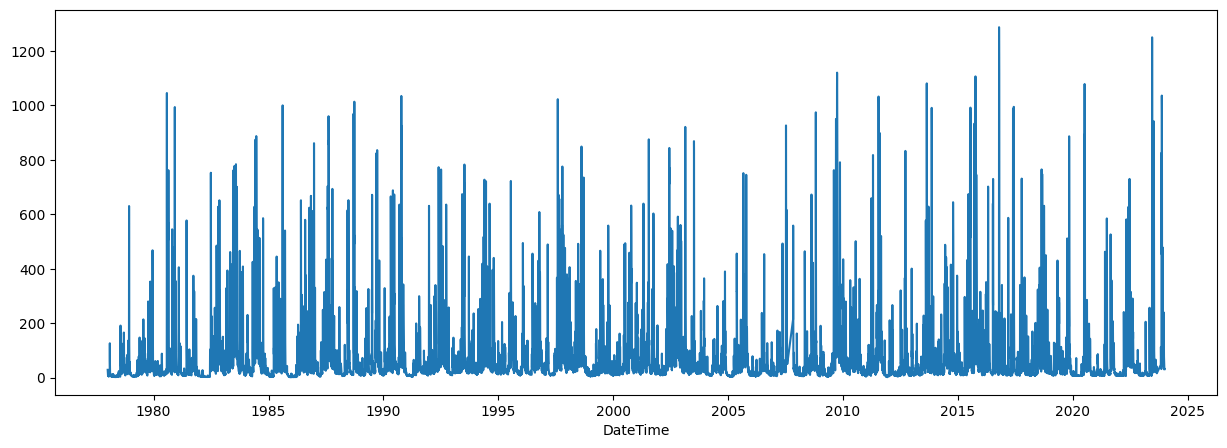

In [246]:
data['Discharge'].plot(figsize=(15, 5))

<Axes: xlabel='Ano Hidro'>

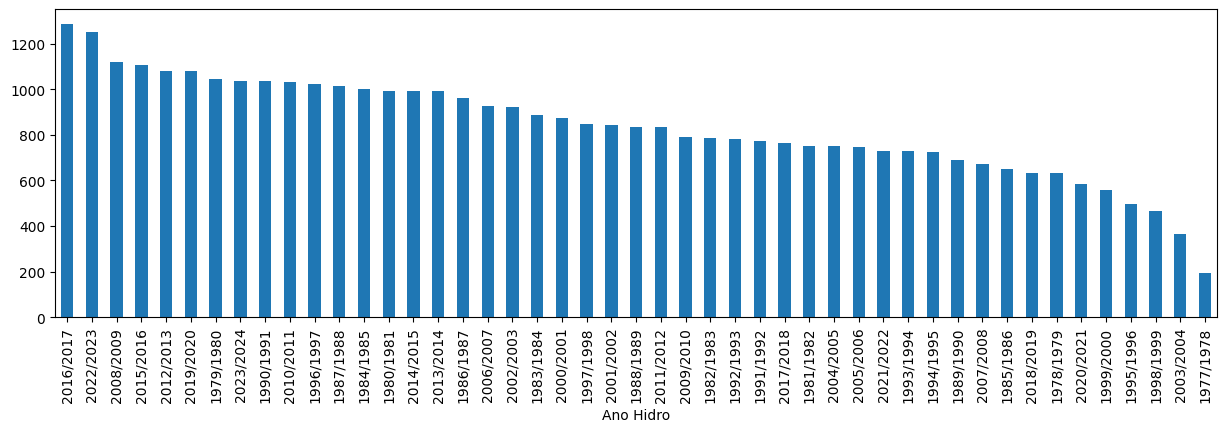

In [124]:
maximum['Discharge'].plot(kind='bar', figsize=(15, 4))

## Adjust to distribution

In [266]:
df, fig = self.calc_return_times(87170000)

In [142]:
info_data = {
    'Município': hreport.ua.name,
    'Estado': hreport.ua.uf,
    'Área': str(hreport.mun['AREA_KM2'].iloc[0]) + ' km²',
    'Área urbana': str(hreport.ua.area) + ' km²'
}
info_html = pd.DataFrame(info_data, index=['']).to_html()

In [278]:
from hydrology.reporter import fig2base64
self._connect_datalake()

In [298]:
stations = {}
for codigo in self.data['selected_down_stations']['codigo']:
    table, fig = self.calc_return_times(codigo, as_html=True)
    stations[int(codigo)] = {
        'hydrology_table': table,
        'hydrology_figure': fig2base64(fig),
        'fig': fig
    }

In [299]:
stations.keys()

dict_keys([87170000, 86470000])

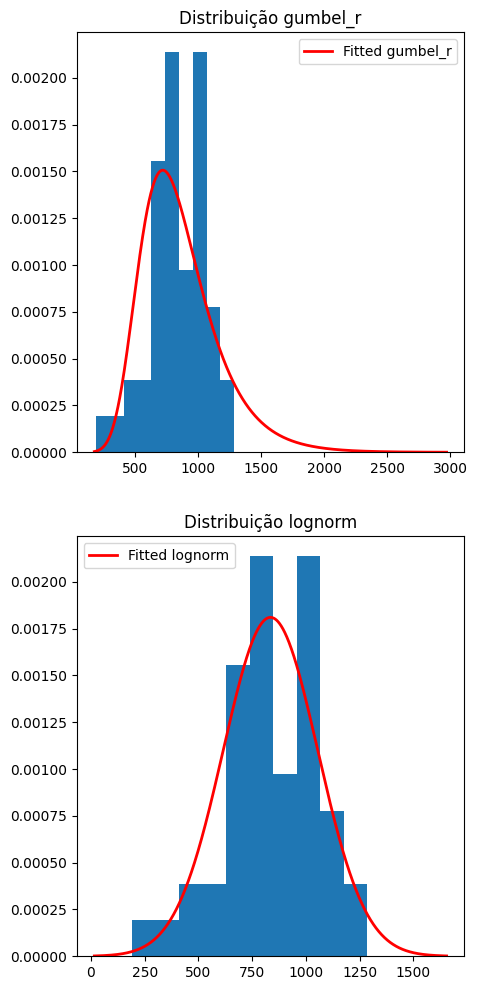

In [300]:
stations[87170000]['fig']

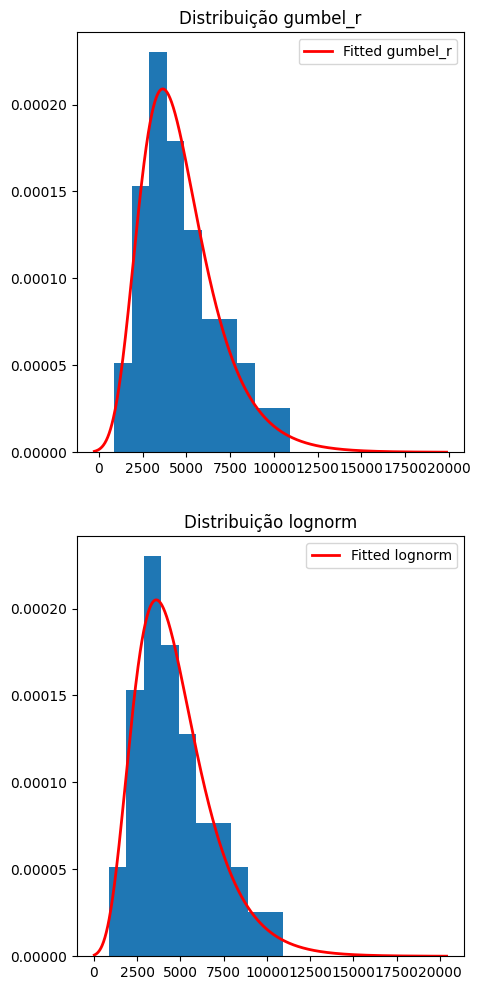

In [301]:
stations[86470000]['fig']

In [308]:
from jinja2 import Environment, FileSystemLoader

# Set up Jinja2 environment
env = Environment(loader=FileSystemLoader('./templates'))
template = env.get_template('report1.html')

# # Save the map PNG into a BytesIO object
# png_buffer = BytesIO()
# fig.savefig(png_buffer, format='png', dpi=300,bbox_inches='tight')

# # Convert the binary PNG data to a base64-encoded string
# png_data = base64.b64encode(png_buffer.getvalue()).decode('utf-8')

# create dicionary of data to be rendered with Jinja
jinja_data = {
    'place': hreport.ua.name + ' / ' + hreport.ua.uf,
    'upstream_stations': hreport.stations_table(stype='up', as_html=True),
    'downstream_stations': hreport.stations_table(stype='down', as_html=True),
    'png_map': fig2base64(map),
    'General_Info': info_html,
    'stations': stations
    # 'hydrology_table': hydrology_table,
    # 'hydrology_figure': hydro_fig
}

# Render the template with your data
html_output = template.render(jinja_data)

# Write the HTML output to a file
with open(f'./RS/{hreport.ua.name}_report.html', 'w') as f:
    f.write(html_output)

print("HTML page generated successfully.")


HTML page generated successfully.


In [285]:
df.Discharge.round(2)

Ano Hidro
2016/2017    1287.08
2022/2023    1250.03
2008/2009    1120.26
2015/2016    1106.48
2012/2013    1080.79
2019/2020    1078.49
1979/1980    1045.46
2023/2024    1036.00
1990/1991    1034.58
2010/2011    1032.50
1996/1997    1022.71
1987/1988    1013.50
1984/1985    1000.03
1980/1981     993.84
2014/2015     991.82
2013/2014     990.94
1986/1987     960.15
2006/2007     926.33
2002/2003     920.90
1983/1984     887.21
2000/2001     875.29
1997/1998     848.87
2001/2002     843.62
1988/1989     835.71
2011/2012     832.88
2009/2010     791.05
1982/1983     783.88
1992/1993     782.74
1991/1992     773.00
2017/2018     764.90
1981/1982     752.65
2004/2005     751.26
2005/2006     745.00
2021/2022     730.00
1993/1994     727.19
1994/1995     722.41
1989/1990     688.06
2007/2008     672.59
1985/1986     651.47
2018/2019     631.19
1978/1979     630.39
2020/2021     584.83
1999/2000     558.56
1995/1996     494.65
1998/1999     466.23
2003/2004     364.87
1977/1978     191.39
Nam

In [284]:
round(df.Discharge, 2)

Ano Hidro
2016/2017    1287.08
2022/2023    1250.03
2008/2009    1120.26
2015/2016    1106.48
2012/2013    1080.79
2019/2020    1078.49
1979/1980    1045.46
2023/2024    1036.00
1990/1991    1034.58
2010/2011    1032.50
1996/1997    1022.71
1987/1988    1013.50
1984/1985    1000.03
1980/1981     993.84
2014/2015     991.82
2013/2014     990.94
1986/1987     960.15
2006/2007     926.33
2002/2003     920.90
1983/1984     887.21
2000/2001     875.29
1997/1998     848.87
2001/2002     843.62
1988/1989     835.71
2011/2012     832.88
2009/2010     791.05
1982/1983     783.88
1992/1993     782.74
1991/1992     773.00
2017/2018     764.90
1981/1982     752.65
2004/2005     751.26
2005/2006     745.00
2021/2022     730.00
1993/1994     727.19
1994/1995     722.41
1989/1990     688.06
2007/2008     672.59
1985/1986     651.47
2018/2019     631.19
1978/1979     630.39
2020/2021     584.83
1999/2000     558.56
1995/1996     494.65
1998/1999     466.23
2003/2004     364.87
1977/1978     191.39
Nam

In [25]:
hreport.stations_table(stype='down', as_html=False)

Código  cobacia            Rio  Área mont. (km²)  Ano Ini  Ano Fim  \
0  87270000    78419        RIO CAÍ           4365.53     1939     2017   
1  87170000    78451        RIO CAÍ           3016.78     1947     2018   
2  86950000  7861333    RIO TAQUARI          25834.60     1931     2017   
3  86895000   786151    RIO TAQUARI          24660.15     1959     2014   
4  86720000    78637    RIO TAQUARI          19137.55     1941     2018   
5  86510000    78651    RIO TAQUARI          16047.25     1940     2018   
6  86470000    78675  RIO DAS ANTAS          12532.98     1970     2008   

   Período (anos) Operando Selecionada  
0              78      sim              
1              71      sim           X  
2              86      sim              
3              55      sim              
4              77      sim              
5              78      sim              
6              38      nao           X

In [18]:
self.data['sup_stations']

Empty GeoDataFrame
Columns: []
Index: []

In [21]:
up_stations = hreport.stations_table(stype='up', as_html=False)


In [22]:
up_stations

Empty GeoDataFrame
Columns: [drn_pk, cotrecho, noorigem, nodestino, cocursodag, nucomptrec, nudistbact, nudistcdag, nuareacont, nuareamont, nogenerico, noligacao, noespecif, noriocomp, nooriginal, cocdadesag, nutrjus, nudistbacc, nuareabacc, nuordemcda, nucompcda, nunivotto, nunivotcda, nustrahler, dedominial, dsversao, cobacia_50k, geometry, nuareamont_log, linewidth, codigo, codalt, nome, rio, respon, operad, dini, dfim, anoini, anofim, emoper, adkm2, pcBrut, pcCons, pcFalh, nanoSF, nSF10pf, qmlt, qmin, qmax, q99, q95, q90, q80, q70, q60, q50, q40, q30, q20, q10, cvano, cvsaz, q95jan, q95fev, q95mar, q95abr, q95mai, q95jun, q95jul, q95ago, q95set, q95out, q95nov, q95dez, qmltjan, qmltfev, qmltmar, qmltabr, qmltmai, qmltjun, qmltjul, qmltago, qmltset, qmltout, qmltnov, qmltdez, q95espjan, q95espfev, q95espmar, q95espabr, q95espmai, q95espjun, q95espjul, q95espago, q95espset, q95espout, q95espnov, q95espdez, q95esp, ...]
Index: []

[0 rows x 149 columns]

In [354]:
fig.savefig('../Jinja/tmp/map.png')

In [353]:
list(self.data.keys())

['ua_reaches',
 'ua_upstream_sheds',
 'ua_upstream_reaches',
 'up_stations',
 'selected_up_stations',
 'ua_downstream_reaches',
 'down_stations',
 'selected_down_stations']

In [330]:
self._get_downstream_stations_()

In [323]:
down_stations = self.data['down_stations'].copy()

down_stations = down_stations.reset_index(drop=False)
down_stations['cobacia'] = down_stations['cobacia'].astype('str')
down_stations['cocursodag'] = down_stations['cocursodag'].astype('str')


In [341]:
down_stations = down_stations.sort_values(['cocursodag', 'cobacia']).groupby('cocursodag').last()

In [325]:
down_stations

cobacia  drn_pk  cotrecho  noorigem  nodestino  nucomptrec  \
cocursodag                                                              
784          78451  307782    307782    190438     190793   10.836886   
786          78675  454574    454574    188516     187287   18.314869   

            nudistbact  nudistcdag  nuareacont    nuareamont  ... bimmin  \
cocursodag                                                    ...          
784          81.699435   63.983003   36.692500   3016.776959  ...    1_2   
786         261.603675  199.476985   51.412323  12532.982469  ...    3_4   

           trimax trimin    quamax   quamin         semmax        semmin  \
cocursodag                                                                 
784         7_8_9  1_2_3  7_8_9_10  1_2_3_4  6_7_8_9_10_11  12_1_2_3_4_5   
786         7_8_9  2_3_4  7_8_9_10  1_2_3_4  6_7_8_9_10_11  12_1_2_3_4_5   

            sthref                  geometry_st  period  
cocursodag                                               
784              1  POINT (-51.38330 -29.59000)    71.0  
786              1  POINT (-51.56690 -29.04500)    38.0  

[2 rows x 149 columns]

In [588]:
data

{'Município': 'Pelotas',
 'Estado': 'RS',
 'Área': '1608.78 km²',
 'Área urbana': '67 km²'}

In [290]:
down_stations['codigo']

cobacia
78419      87270000.0
78451      87170000.0
7861333    86950000.0
786151     86895000.0
78637      86720000.0
78651      86510000.0
78675      86470000.0
Name: codigo, dtype: float64

In [254]:
xmin, xmax, ymin, ymax = ax.axis()
stations = self.stations.cx[xmin:xmax, ymin:ymax]

In [256]:
stations = self.stations.copy()

In [257]:
stations = stations[stations['respon'] == 'ANA']
len(stations)
stations['period'] = stations['anofim'] - stations['anoini']
stations = stations[stations['period'] >= 10]
len(stations)
stations = stations[stations['anofim'] >= 2000]
len(stations)

2495

In [253]:
stations.columns

Index(['codigo', 'codalt', 'nome', 'rio', 'respon', 'operad', 'dini', 'dfim',
       'anoini', 'anofim',
       ...
       'bimmin', 'trimax', 'trimin', 'quamax', 'quamin', 'semmax', 'semmin',
       'cobacia', 'sthref', 'geometry'],
      dtype='object', length=119)

In [218]:
otto_basins = {i: gpd.read_file(f'/data/Hidrografia/Niveis_Otto/geoft_bho_ach_otto_nivel_0{i}.gpkg',
                                engine='pyogrio', use_arrow=True, bbox=tuple(self.ua.df.total_bounds)) 
                                for i in range (1, 7)}

In [231]:
otto = otto_basins[5].get_touching(otto, self.ua.df, buffer=0)

In [236]:
Otto.get_touching(otto, self.ua.df, buffer=0)

wts_pk wts_cd_pfafstetterbasin  wts_cd_pfafstetterbasincodelevel  \
2  1346676                   79667                                 5   

   wts_gm_area                                           geometry  index_right  
2   888.285032  MULTIPOLYGON (((-51.51286 -29.24450, -51.51311...          0.0

In [204]:
self = hreport

In [211]:
len(df)

96

In [212]:
df.drop_duplicates()

drn_pk  cotrecho  noorigem  nodestino cocursodag   cobacia  \
248470   92788     92788    190916     191290   78691146  78691146   
185860  125792    125792    191290     191281    7869114  78691145   
341143  174181    174181    191281     191028    7869114  78691143   
296949  190657    190657    191028     190850    7869114  78691141   
374342  328138    328138    190850     190039        786   7869113   
...        ...       ...       ...        ...        ...       ...   
407358  383990    383990    190107     189645        784     78419   
52528    51841     51841    189645     189951        784     78417   
408754  383982    383982    189951     190950        784     78415   
408755  383983    383983    190950     192063        784     78413   
408765  384001    384001    192063     192088        784     78411   

        nucomptrec  nudistbact  nudistcdag  nuareacont  ...   nucompcda  \
248470    6.557144  324.574000    0.000000   19.426372  ...    6.557144   
185860    3.655408  320.918592    6.848987   10.304052  ...   17.155287   
341143    2.645950  318.272642    4.203037    8.998545  ...   17.155287   
296949    4.203037  314.069605    0.000000   11.494519  ...   17.155287   
374342    5.981123  308.088482  245.961792   27.032790  ...  517.163225   
...            ...         ...         ...         ...  ...         ...   
407358   10.684426   63.045296   45.328865   61.107212  ...  224.989408   
52528     3.819815   59.225481   41.509050    5.074822  ...  224.989408   
408754   18.002133   41.223348   23.506917  115.631106  ...  224.989408   
408755   22.566595   18.656753    0.940321  175.884522  ...  224.989408   
408765    0.940321   17.716432    0.000000    0.918372  ...  224.989408   

       nunivotto nunivotcda nustrahler dedominial  \
248470         8        8.0        1.0   Estadual   
185860         8        7.0        2.0   Estadual   
341143         8        7.0        2.0   Estadual   
296949         8        7.0        2.0   Estadual   
374342         7        3.0        4.0   Estadual   
...          ...        ...        ...        ...   
407358         5        3.0        4.0   Estadual   
52528          5        3.0        4.0   Estadual   
408754         5        3.0        4.0   Estadual   
408755         5        3.0        4.0   Estadual   
408765         5        3.0        4.0   Estadual   

                                     dsversao cobacia_50k  \
248470  BHO bho_2017_v_01_05_5k de 2018-06-20     7869112   
185860  BHO bho_2017_v_01_05_5k de 2018-06-20     7869112   
341143  BHO bho_2017_v_01_05_5k de 2018-06-20     7869112   
296949  BHO bho_2017_v_01_05_5k de 2018-06-20     7869112   
374342  BHO bho_2017_v_01_05_5k de 2018-06-20     7869111   
...                                       ...         ...   
407358  BHO bho_2017_v_01_05_5k de 2018-06-20       78417   
52528   BHO bho_2017_v_01_05_5k de 2018-06-20       78415   
408754  BHO bho_2017_v_01_05_5k de 2018-06-20       78413   
408755  BHO bho_2017_v_01_05_5k de 2018-06-20       78411   
408765  BHO bho_2017_v_01_05_5k de 2018-06-20       78411   

                                                 geometry  nuareamont_log  \
248470  MULTILINESTRING ((-51.36934 -29.19993, -51.363...        1.310191   
185860  MULTILINESTRING ((-51.34262 -29.14848, -51.342...        1.869907   
341143  MULTILINESTRING ((-51.34303 -29.11898, -51.343...        2.003281   
296949  MULTILINESTRING ((-51.36021 -29.10282, -51.360...        2.126789   
374342  MULTILINESTRING ((-51.37448 -29.06733, -51.375...        3.916492   
...                                                   ...             ...   
407358  MULTILINESTRING ((-51.42858 -29.64860, -51.428...        3.640137   
52528   MULTILINESTRING ((-51.45968 -29.70826, -51.459...        3.649986   
408754  MULTILINESTRING ((-51.43886 -29.72347, -51.437...        3.667102   
408755  MULTILINESTRING ((-51.36606 -29.79660, -51.366...        3.696275   
408765  MULTILINESTRING ((-51.28747 -29.93464, -5

<Axes: >

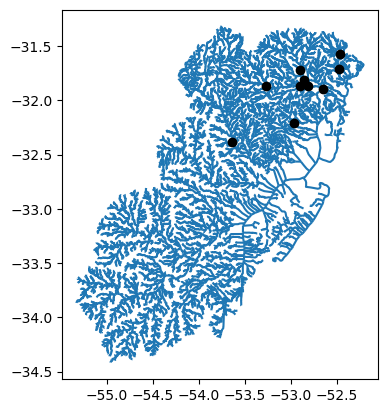

In [139]:
ax = self.data['ua_upstream_reaches'].plot(zorder=0)
self.data['up_stations'].plot(ax=ax, color='black', zorder=1)

In [140]:
reaches = self.data['ua_upstream_reaches']

In [185]:
cobacia = "7941471"

row = reaches.query(f"cobacia == '{cobacia}'")

row

drn_pk  cotrecho  noorigem  nodestino cocursodag  cobacia  nucomptrec  \
379524  335775    335775    175446     175978      79414  7941471     5.86621   

        nudistbact  nudistcdag  nuareacont  ...  nucompcda nunivotto  \
379524   37.440685   22.035969    8.988585  ...  43.453612         7   

       nunivotcda nustrahler dedominial  \
379524        5.0        2.0   Estadual   

                                     dsversao cobacia_50k  \
379524  BHO bho_2017_v_01_05_5k de 2018-06-20       79414   

                                                 geometry  nuareamont_log  \
379524  MULTILINESTRING ((-52.52807 -31.69309, -52.528...         1.92825   

        linewidth  
379524   0.569439  

[1 rows x 31 columns]

In [189]:
downstream = gpd.GeoDataFrame()

while not row.iloc[0]['cocdadesag'] == '':
    downstream = pd.concat([downstream, row], axis=0)

    row = reaches.query(f"noorigem == {row['nodestino'].iloc[0]}")

<Axes: >

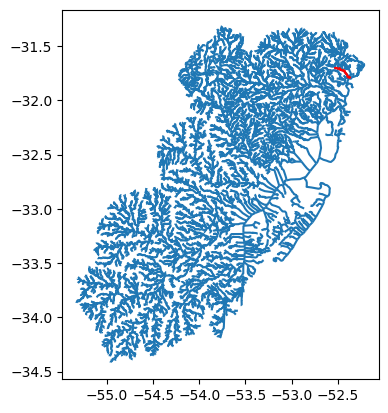

In [191]:
ax=reaches.plot()
downstream.plot(ax=ax, edgecolor='red')

In [178]:
self.reaches.query(f"cobacia == '79411'").iloc[0]['cocdadesag']

''

In [165]:
row['noorigem']

379524    175446
Name: noorigem, dtype: int32

In [162]:
import pandas as pd

In [163]:
pd.isnull

<function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>

In [134]:
self.data['ua_reaches']

drn_pk  cotrecho  noorigem  nodestino cocursodag   cobacia  \
75668   138436    138436    177144     177533    7941342   7941342   
91151    26048     26048    176656     177141    7941346   7941346   
119780   46739     46739    177315     177265    7941344  79413441   
138509  306272    306272    177268     177315   79413442  79413442   
190234   52709     52709    177340     177315    7941344  79413443   
260582  160407    160407    178332     178620    7941212   7941212   
282981   95181     95181    178012     178517        794    794131   
290369  130836    130836    177679     178012        794    794133   
309324  372479    372479    177533     177679     794134   7941341   
339606  168707    168707    176963     177141     794134  79413471   
342896  180097    180097    177265     177533     794134   7941343   
392509  356923    356923    177141     177265     794134   7941345   
420498  403082    403082    178620     178517      79412   7941211   
420531  403089    403089    179001     178620      79412  79412131   
455117  457515    457515    176469     177130      79414    794143   
462394  168439    168439    177890     178012     794132    794132   

        nucomptrec  nudistbact  nudistcdag  nuareacont  ...  nunivotto  \
75668     3.157408   15.065445    0.000000    6.144002  ...          7   
91151     5.972264   25.447455    0.000000   10.428924  ...          7   
119780    1.106378   23.522305    0.000000    0.359935  ...          8   
138509    2.201441   24.628683    0.000000    6.461186  ...          8   
190234    4.487405   24.628683    1.106378    8.566926  ...          8   
260582    4.747419   16.232095    0.000000   18.460287  ...          7   
282981    4.299214    5.709245    5.709245   26.487237  ...          6   
290369    2.759297   10.008459   10.008459    4.834518  ...          6   
309324    2.297689   12.767756    0.000000    2.351612  ...          7   
339606    3.674194   25.447455   12.679699    2.466939  ...          8   
342896    8.456860   15.065445    2.297689   50.042124  ...          7   
392509    1.925150   23.522305   10.754549    1.387694  ...          7   
420498   10.522850    5.709245    0.000000   48.671774  ...          7   
420531    3.933236   16.232095   10.522850    8.889328  ...          8   
455117   11.381168   19.740176    4.335461   38.979397  ...          6   
462394    4.454564   10.008459    0.000000   13.347324  ...          6   

       nunivotcda nustrahler dedominial  \
75668         7.0        1.0   Estadual   
91151         7.0        1.0   Estadual   
119780        7.0        2.0   Estadual   
138509        8.0        1.0   Estadual   
190234        7.0        1.0   Estadual   
260582        7.0        1.0   Estadual   
282981        3.0        7.0    Federal   
290369        3.0        7.0    Federal   
309324        6.0        3.0   Estadual   
339606        6.0        2.0   Estadual   
342896        6.0        3.0   Estadual   
392509        6.0        2.0   Estadual   
420498        5.0        4.0   Estadual   
420531        5.0        4.0   Estadual   
455117        5.0        3.0   Estadual   
462394        6.0        1.0   Estadual   

                                     dsversao cobacia_50k  \
75668   BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
91151   BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
119780  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
138509  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
190234  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
260582  BHO bho_2017_v_01_05_5k de 2018-06-20      794121   
282981  BHO bho_2017_v_01_05_5k de 2018-06-20      794131   
290369  BHO bho_2017_v_01_05_5k de 2018-06-20      794131   
309324  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
339606  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
342896  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
392509  BHO bho_2017_v_01_05_5k de 2018-06-20      794132   
420498  BHO bho_2017_v_01_05_5k d

No city selected. Use `select_urban_area` first.


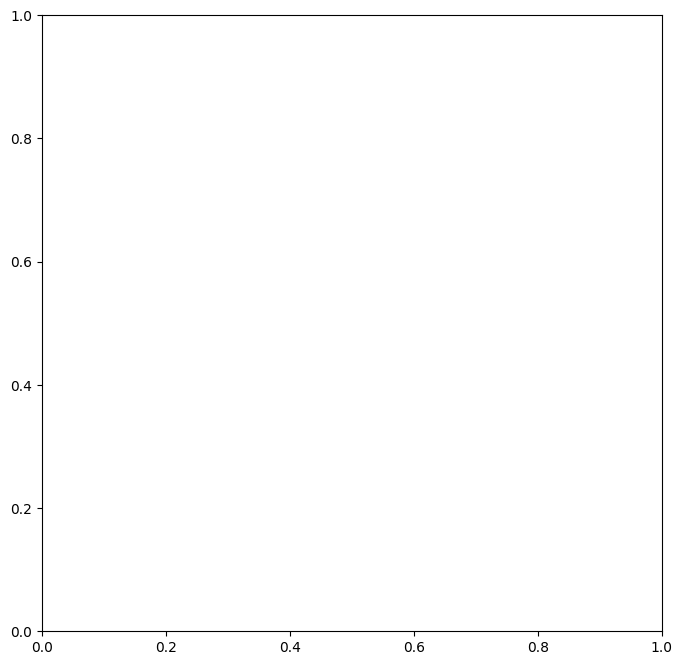

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))
hreport.plot_urban_area(ax=ax)

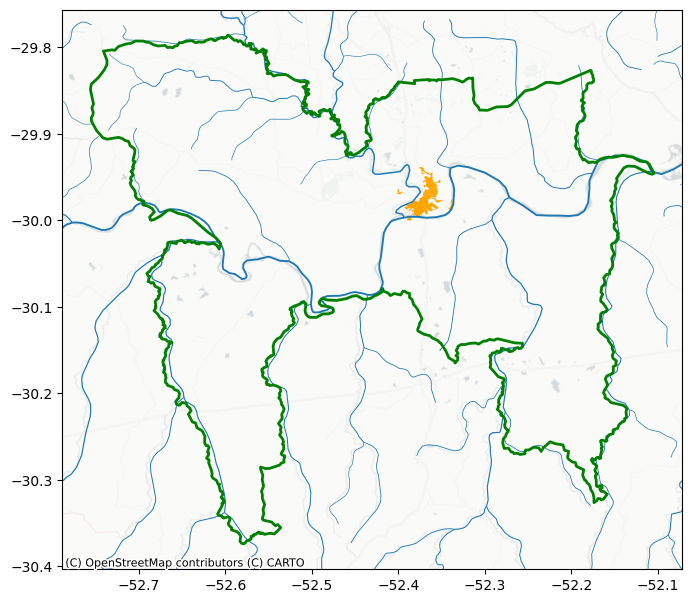

In [110]:
fig, ax = plt.subplots(figsize=(8, 8))
hreport.plot_municipality(ax=ax)

In [114]:
hreport._get_upstream_ua()

In [117]:
hreport.data['ua_reaches']

drn_pk  cotrecho  noorigem  nodestino cocursodag cobacia  nucomptrec  \
376297  330763    330763    177098     177793         78   78733   11.025705   
439329  432560    432560    176592     177098       7874  787411   17.756517   

        nudistbact  nudistcdag  nuareacont  ...  nunivotto nunivotcda  \
376297  136.789250   136.78925   64.750016  ...          5        2.0   
439329  147.814954     0.00000   84.206986  ...          6        4.0   

       nustrahler dedominial                               dsversao  \
376297        6.0   Estadual  BHO bho_2017_v_01_05_5k de 2018-06-20   
439329        4.0   Estadual  BHO bho_2017_v_01_05_5k de 2018-06-20   

       cobacia_50k                                           geometry  \
376297       78733  MULTILINESTRING ((-52.39310 -29.99685, -52.392...   
439329      787411  MULTILINESTRING ((-52.43430 -29.91661, -52.433...   

        nuareamont_log  linewidth  index_right  
376297        4.589172   1.355246          0.0  
439329        3.560726   1.051531          0.0  

[2 rows x 32 columns]

<Axes: >

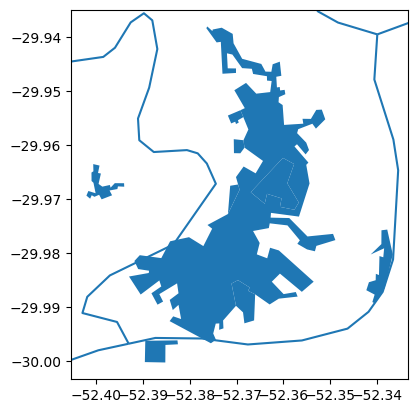

In [102]:
fig, ax = plt.subplots()
hreport.ua.df.plot(ax=ax)
ax.autoscale(False)
hreport.reaches.cx[xmin:xmax, ymin:ymax].plot(ax=ax)

In [95]:
xmin, xmax, ymin, ymax = ax.axis()

In [104]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

### Urban Areas

First, let's open the Urban Area and the municipalities.

In [3]:
# select an arbitrary city
# Caxias do Sul
# São Jerônimo
# Pelotas
# Santa Maria
# Read urban areas
uas = UrbanAreas('/data/RS_BR_Urban_Areas/')
ua = uas.get_urban_area('Santa Maria', 0.5, (1.2, 1))

# and corresponding records
mun = muns[muns['CD_MUN'] == ua.cd_mun]

NameError: name 'muns' is not defined

In [8]:
ua.df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# read all the necessary shapes/vectors
# Read the municipalities
muns = gpd.read_file('/data/Estacoes_Municipios/Mun_MIDR_Pop_2022 1.shp', engine='pyogrio', use_arrow=True).set_crs(crs)


In [ ]:
ua.df = ua.df.to_crs(crs)

In [ ]:
# 1 deg = aprox 111km

# total_bounds = unary_union([
#     box(*ref_stations.total_bounds),
#     box(*mun.total_bounds),
# ]).buffer(0.2)

<Axes: >

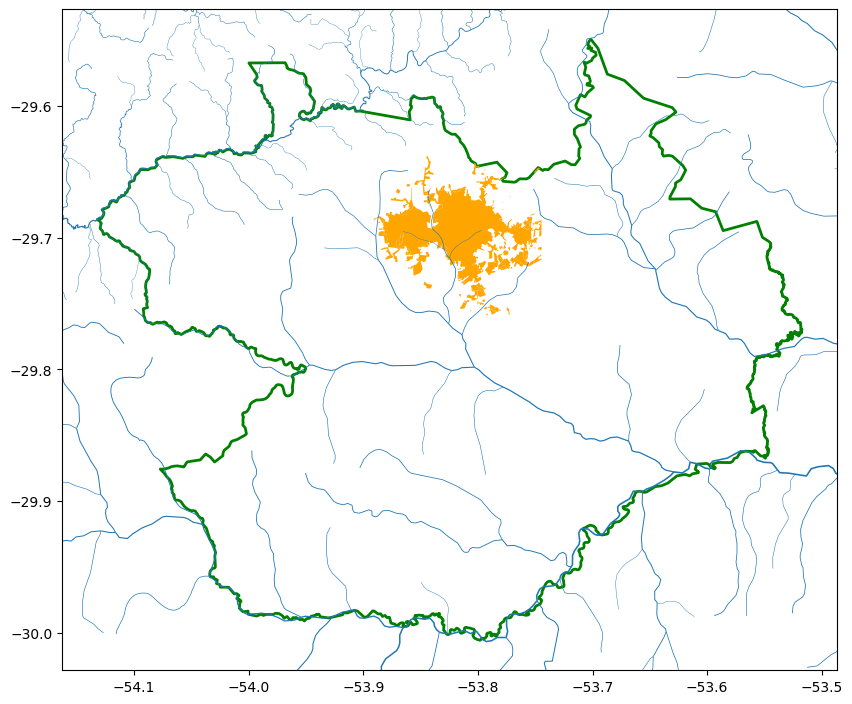

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
mun.plot(ax=ax, facecolor='none', edgecolor='green', linewidth=2)
ua.df.plot(ax=ax, facecolor='orange')
ax.autoscale(False)
rivers.plot(ax=ax, linewidth=rivers['linewidth'])


## Load the Databases

### Load the State

In [9]:
state_abbr = 'RS'
state = gpd.read_file('/data/BR_UF_2022/BR_UF_2022.shp', engine='pyogrio', use_arrow=True, where=f"SIGLA_UF = '{state_abbr}'")
buffered_state = state.buffer(1)

# 1 deg = aprox 111km


/tmp/ipykernel_33790/1512409598.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_state = state.buffer(1)


### Load Rivers and Watersheds

In [15]:
# Read the River Reaches database
rivers = gpd.read_file(
    # '/data/Estacoes_Municipios/BHO_v6_Reg_Sul.shp',
    '/data/Hidrografia/BHO_2017_5k/bho_250k_v_02_03.gpkg',
    # where="nuareamont > 30",
    engine='pyogrio',
    # bbox=tuple(buffered_state.total_bounds),
    use_arrow=True
)

# Create a linewidth for the rivers, through the log of areamont
rivers['nuareamont_log'] = np.log10(rivers['nuareamont']+1)
rivers['linewidth'] = 2*rivers['nuareamont_log'] / rivers['nuareamont_log'].max()

# cast cobacia and cocursodag as string
rivers['cobacia'] = rivers['cobacia'].astype('str')
rivers['cocursodag'] = rivers['cocursodag'].astype('str')

# read the watersheds
watersheds = gpd.read_file(
    '/data/Hidrografia/BHO_2017_5k/geoft_bho_2017_5k_area_drenagem.gpkg',
    engine='pyogrio',
    # bbox=tuple(buffered_state.total_bounds),
    use_arrow=True
)

/usr/lib/python3.10/contextlib.py:135: RuntimeWarning: disk I/O error: this file is a WAL-enabled database. It cannot be opened because it is presumably read-only or in a read-only directory. Retrying with IMMUTABLE=YES open option
  return next(self.gen)


In [12]:
crs = rivers.crs

In [13]:
crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Load the Stations

In [216]:
# Read the stations
stations = gpd.read_file(
    '/data/Hidrografia/Hidrorreferenciamento/Fluviometricas_Hidrorreferenciadas_Brasil_vf.shp', 
    engine='pyogrio',
    use_arrow=False,
).set_crs(crs)

stations['codigo'] = stations['codigo'].astype('int')


### Load Otto Basins

For performance reasons, only otto-basins that intersects the urban area will be loaded.

In [221]:
otto_basins = {i: gpd.read_file(f'/data/Hidrografia/Niveis_Otto/geoft_bho_ach_otto_nivel_0{i}.gpkg',
                                engine='pyogrio', use_arrow=True, bbox=tuple(ua.df.total_bounds)) 
                                for i in range (1, 7)}

## Spatial Processing

In [223]:
def get_upstream(reaches, cobacia, cocursodagua):
    """The df should have the `cobacia` column for the upstream query to work"""
    upstream = reaches[reaches['cobacia'].str.startswith(cocursodagua)]
    upstream = upstream.query(f"cobacia >= '{cobacia}'")

    return upstream

def get_combined_upstream(reaches, to_search):
    """
    Advanced version of the get_upstream function
    Select upstream reaches for all reaches that are listed in the to_search dataframe
    The to_search dataframe should have `cocursodag` and `cobacia` columns
    """
    df = to_search.sort_values(['cocursodag', 'cobacia']).copy()
    upstream = gpd.GeoDataFrame()

    while len(df) > 0:
        row = df.iloc[0]
        ups = get_upstream(reaches, row['cobacia'], row['cocursodag'])
        upstream = pd.concat([upstream, ups])

        df = df[~df['cobacia'].isin(upstream['cobacia'])]

    return upstream


### Select reaches that touch the urban area

In [224]:
ua_hull = gpd.GeoDataFrame(ua.df.dissolve().convex_hull.buffer(7e-4)).set_geometry(0)
ua_reaches = rivers.sjoin(gpd.GeoDataFrame(ua_hull), how='left', predicate='intersects')
ua_reaches = ua_reaches[~pd.isna(ua_reaches['index_right'])]

len(ua_reaches)



8

#### Get reaches upstream the urban area

In [225]:
ua_upstream_sheds = get_combined_upstream(watersheds, ua_reaches)
ua_upstream_rivers = get_combined_upstream(rivers, ua_reaches)
len(ua_upstream_rivers)

8

#### Get Upstream Stations

In [226]:
upstream_stations = ua_upstream_rivers.set_index('cobacia').join(stations.set_index('cobacia'), how='left', rsuffix='_st')
upstream_stations = upstream_stations.dropna(subset='codigo').set_geometry('geometry_st')
len(upstream_stations)

0

#### Remove stations upstream other stations

In [232]:
main_stations = gpd.GeoDataFrame()
if len(upstream_stations) > 0:
    upstream_stations = upstream_stations.reset_index(drop=False)
    stations = upstream_stations.sort_values(['cocursodag', 'cobacia']).copy()

    while len(stations) > 0:

        # get the first stations and save it to the main stations
        row = stations.iloc[[0]]
        main_stations = pd.concat([main_stations, row])

        row = row.iloc[0]

        # erase all stations upstream this station (including this one)
        ups = get_upstream(upstream_stations, row['cobacia'], row['cocursodag'])
        stations = stations[~stations['cobacia'].isin(ups['cobacia'])]

    


### Plot the map

Text(0.5, 1.0, 'Visão Geral')

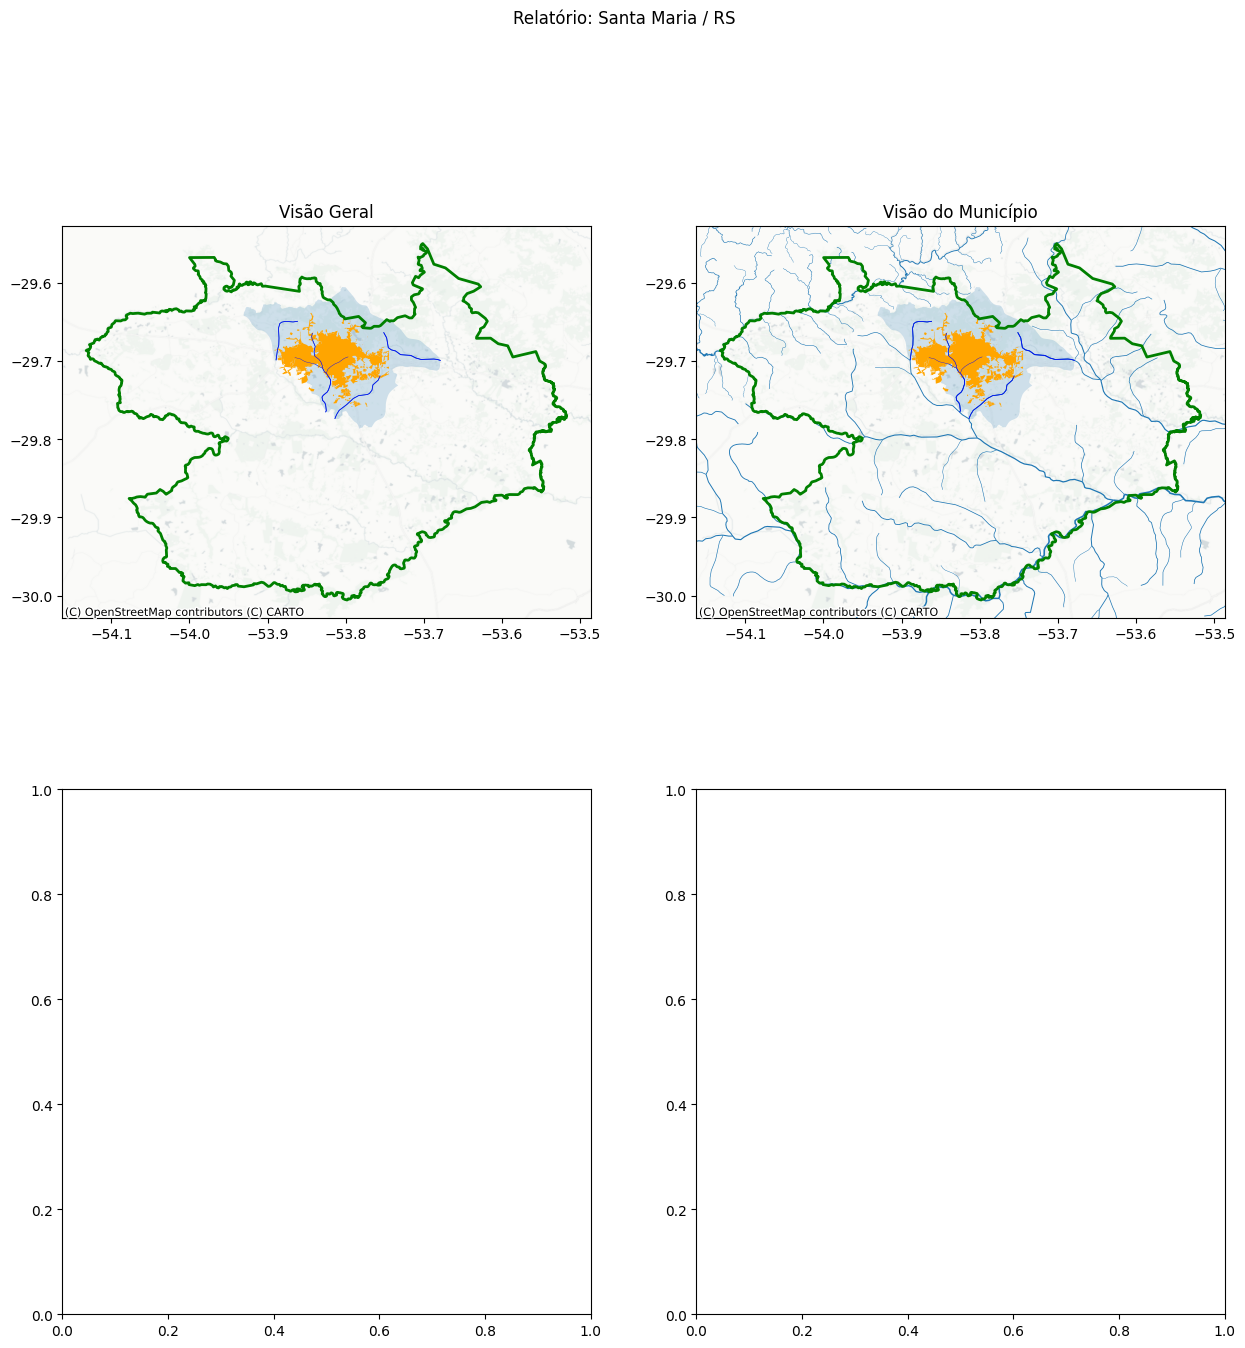

In [234]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plot the municipality
ax = axs[0, 1]
mun.plot(ax=ax, facecolor='none', alpha=1, edgecolor='green', zorder=5, linewidth=2.)
xmin, xmax, ymin, ymax = ax.axis()
ua.df.plot(ax=ax, facecolor='orange')

# freezes the viewport
ax.autoscale(False)

# plot the upstream reaches
ua_reaches.plot(ax=ax, linewidth=ua_reaches['linewidth'], color='blue')
ua_upstream_rivers.plot(ax=ax, linewidth=ua_upstream_rivers['linewidth'], zorder=-1)
ua_upstream_sheds.plot(ax=ax, zorder=-2, alpha=0.2)
rivers.plot(ax=ax, linewidth=rivers['linewidth'], zorder=-2)

if len(upstream_stations) > 0:
    upstream_stations.plot(ax=ax, color='gray', zorder=10)
    main_stations.plot(ax=ax, color='red', zorder=11)

# Plot basemap
cx.add_basemap(ax=ax, crs='epsg:4326', source=cx.providers.CartoDB.PositronNoLabels, zorder=-3)

ax.set_title('Visão do Município')

## Plot the overall context
ax = axs[0, 0]
ua.df.plot(ax=ax, facecolor='orange')
ua_reaches.plot(ax=ax, linewidth=ua_reaches['linewidth'], color='blue')
# freeze the viewport
xmin, xmax, ymin, ymax = ax.axis()

# plot the upstream reaches
ua_upstream_rivers.plot(ax=ax, linewidth=ua_upstream_rivers['linewidth'], zorder=-1)
ua_upstream_sheds.plot(ax=ax, zorder=-2, alpha=0.2)

if len(upstream_stations) > 0:
    upstream_stations.plot(ax=ax, color='gray', zorder=10)
    main_stations.plot(ax=ax, color='red', zorder=11)

mun.plot(ax=ax, facecolor='none', alpha=1, edgecolor='green', zorder=5, linewidth=2.)

# Plot basemap
cx.add_basemap(ax=ax, crs='epsg:4326', source=cx.providers.CartoDB.PositronNoLabels, zorder=-3)

# Annotate station names
# create a list for the texts 
if len(main_stations) > 0:
    texts = []
    for _, row in main_stations.iterrows():
        # get station title
        texts.append(
            ax.text(
                x=row.geometry_st.x,
                y=row.geometry_st.y,
                s=str(int(row['codigo'])),
                zorder=101,
                # fontweight='bold',
                fontsize=11
            )
        )
        
    adjust_text(texts, ax=ax, expand_axes=True, ensure_inside_axes=True)

# otto_basins[3].plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3, zorder=4)
# otto_basins[4].plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=2, zorder=3)


fig.suptitle(f"Relatório: {ua.name} / {ua.uf}")
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

ax.set_title('Visão Geral')

In [197]:
def draw_dataframe_table(df, ax, fontsize=14, bbox=[0, 0.8, 1, 0.2], colWidths=None):
    # Create a table plot from the DataFrame
    ax.clear()
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='top', fontsize=24, 
                     colColours=['lightgray']*len(df.columns), bbox=bbox, colWidths=colWidths)
    
    # # Color the first row and first column background as gray
    # for i in range(len(df.columns)):
    #     for j in range(len(df)):
    #         if i == 0 or j == 0:
    #             table[(j, i)].set_facecolor('lightgray')

    # Set font properties for all cells
    for cell in table._cells:
        if cell[0] == 0:  # For the first row (header)
            table._cells[cell].set_fontsize(fontsize)
            table._cells[cell].set_text_props(weight='bold')
        else:
            table._cells[cell].set_fontsize(fontsize)

    # Adjust cell padding and table properties
    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(1, 2)  # Scale the table (increase the cell height)
    ax.axis('tight')  # Adjust the axes to fit the table

    # Hide axes
    ax.axis('off')



In [198]:
data = {
    'Município': ua.name,
    'Estado': ua.uf,
    'Área': str(mun['AREA_KM2'].iloc[0]) + ' km²',
    'Área urbana': str(ua.area) + ' km²'
}


In [199]:
df = pd.DataFrame(data, index=["valor"]).T
df = df.reset_index(drop=False)
df = df.rename(columns={'index': 'Info'})

In [200]:
main_stations

cobacia  drn_pk  cotrecho  noorigem  nodestino cocursodag  nucomptrec  \
0    7859  330785    330785    186078     187592         78   11.142048   

   nudistbact  nudistcdag  nuareacont  ...  bimmax  bimmin  trimax  trimin  \
0   50.984642   50.984642  166.224181  ...  -99999  -99999  -99999  -99999   

   quamax  quamin  semmax  semmin  sthref                  geometry_st  
0  -99999  -99999  -99999  -99999       1  POINT (-51.69610 -29.94170)  

[1 rows x 149 columns]

In [202]:
main_stations['codigo'] = main_stations['codigo'].astype('str').str[:8]
main_stations['nuareamont'] = main_stations['nuareamont'].round(1)
main_stations['anoini'] = main_stations['anoini'].astype('int')
main_stations['anofim'] = main_stations['anofim'].astype('int')
main_stations['periodo'] = main_stations['anoini'].astype('str') + '/' + main_stations['anofim'].astype('str')
main_stations[['codigo', 'rio', 'nuareamont', 'anoini', 'anofim', 'periodo']]

codigo        rio  nuareamont  anoini  anofim    periodo
0  87035000  RIO JACUÍ     68835.2    1972    1976  1972/1976

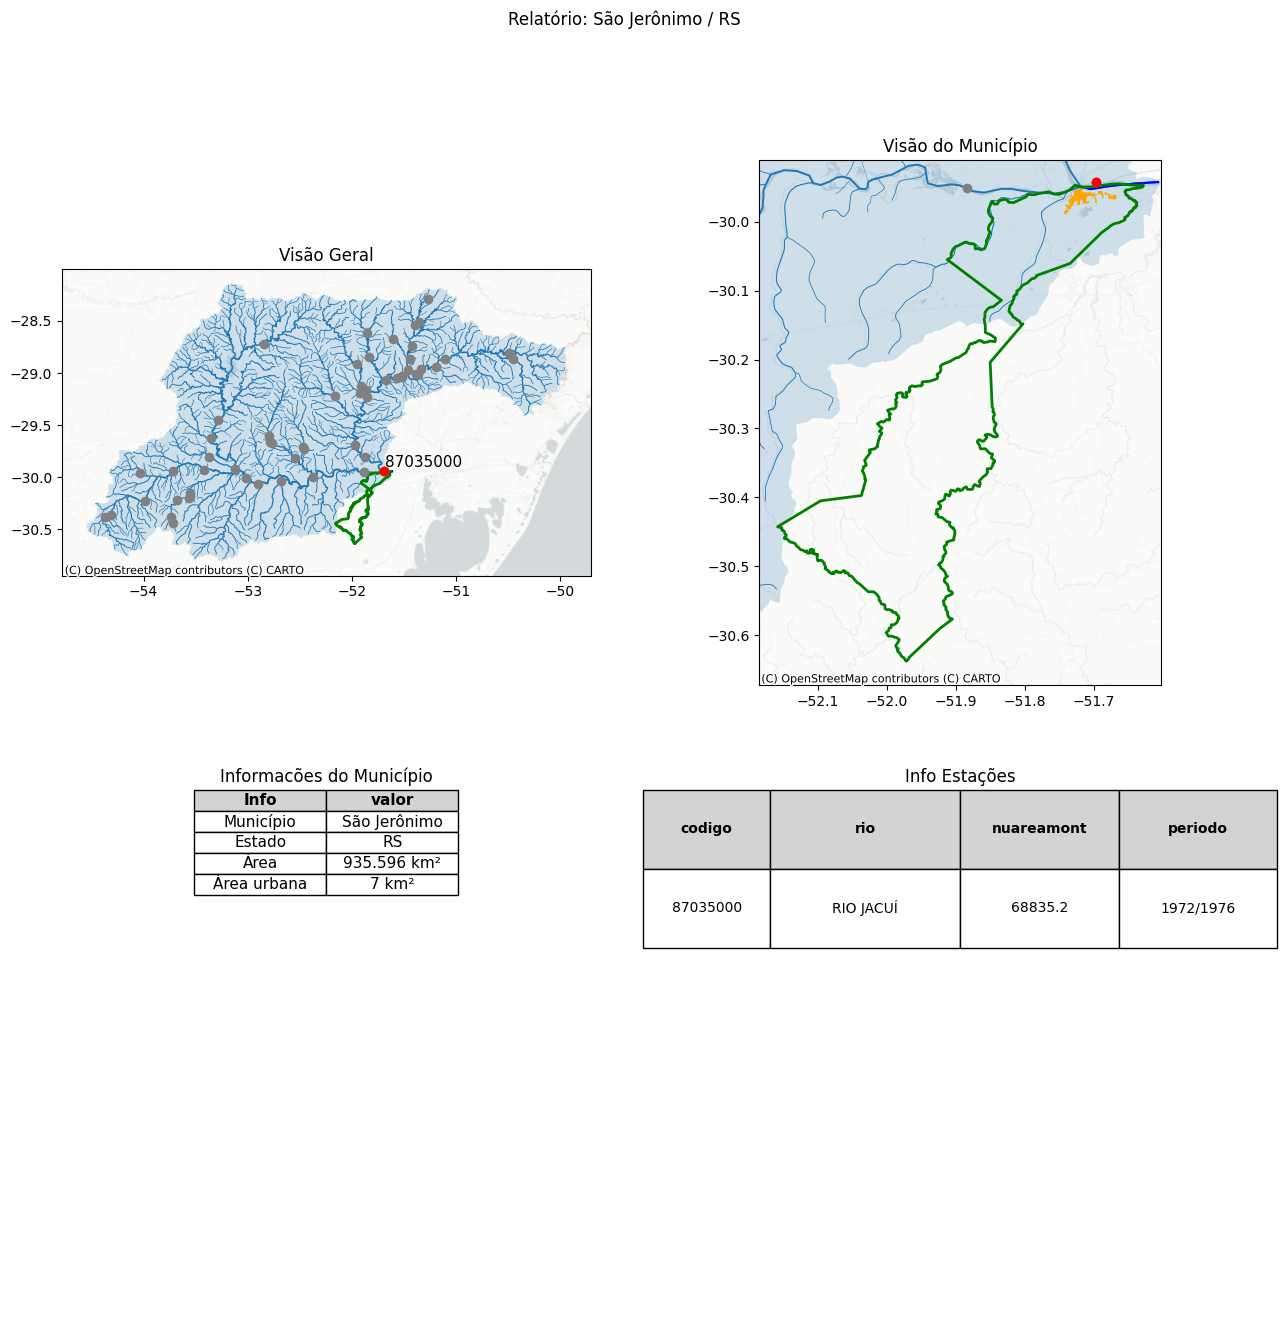

In [203]:
draw_dataframe_table(df, axs[1, 0], fontsize=11, bbox=[0.25, 0.8, 0.5, 0.2])
draw_dataframe_table(main_stations[['codigo', 'rio', 'nuareamont', 'periodo']], axs[1, 1], 
                     fontsize=10, bbox=[-0.1, 0.7, 1.2, 0.3], colWidths=[0.2, 0.3, 0.25, 0.25])

axs[1, 0].set_title('Informacões do Município')
axs[1, 1].set_title('Info Estações')

fig

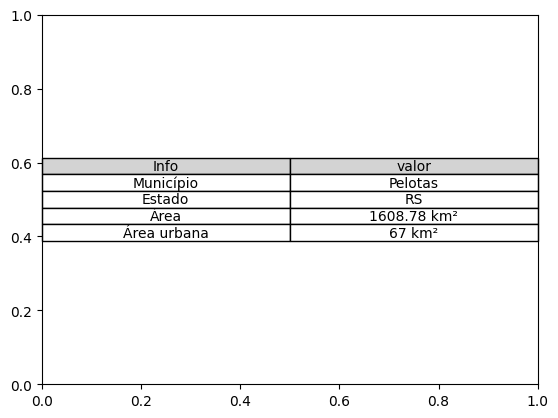

In [76]:
fig, ax = plt.subplots()
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['lightgray']*len(df.columns))


In [ ]:

for _, row in ref_stations.iterrows():
    index = ref_stations_series[ref_stations_series == row['Codigo']].index[0]
    upstream_area = round(rivers.query(f"cobacia == '{cobacias[row['Codigo']]['cobacia']}'")['nuareamont'].iloc[0], 2)

    data[index] = str(row['Codigo']) + f' ({upstream_area} km²)'
    
data

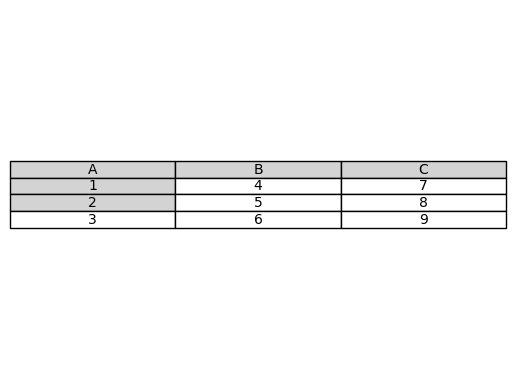

In [35]:
import matplotlib.pyplot as plt

def draw_dataframe_table(df, ax):
    # Create a table plot from the DataFrame
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['lightgray']*len(df.columns))
    
    # Color the first row and first column background as gray
    for i in range(len(df.columns)):
        for j in range(len(df)):
            if i == 0 or j == 0:
                table[(j, i)].set_facecolor('lightgray')

    # Hide axes
    ax.axis('off')

# Example usage:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}
df = pd.DataFrame(data)

# Create a matplotlib figure and axes
fig, ax = plt.subplots()

# Draw the dataframe table on the axes
draw_dataframe_table(df, ax)

plt.show()
